In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")
%matplotlib inline
os.chdir("C:\\Python27\\titanic")
os.getcwd()

'C:\\Python27\\titanic'

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.info()
print("---------------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare 

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.dtypes
print("---------------------------")
test.dtypes

---------------------------


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#trainのEmbarkedの2つの欠損値を埋める

train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train.fillna({"Embarked" : "S"}, inplace = True)
Em_map = {"S":1,"C":2,"Q":3}
train["Embarked"] = train["Embarked"].map(Em_map).astype(int)
test["Embarked"] = test["Embarked"].map(Em_map).astype(int)

In [9]:
train["Sex"] = train["Sex"].map({"female":0,"male":1}).astype(int)
test["Sex"] = test["Sex"].map({"female":0,"male":1}).astype(int)

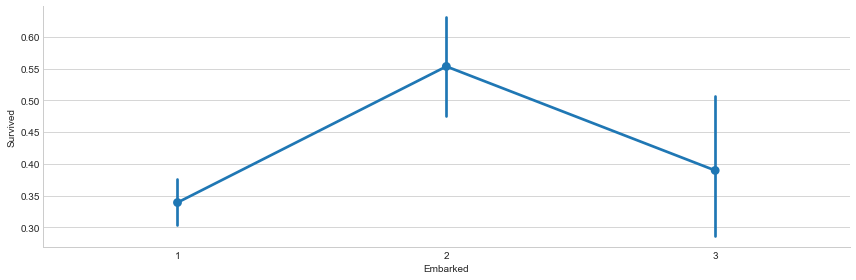

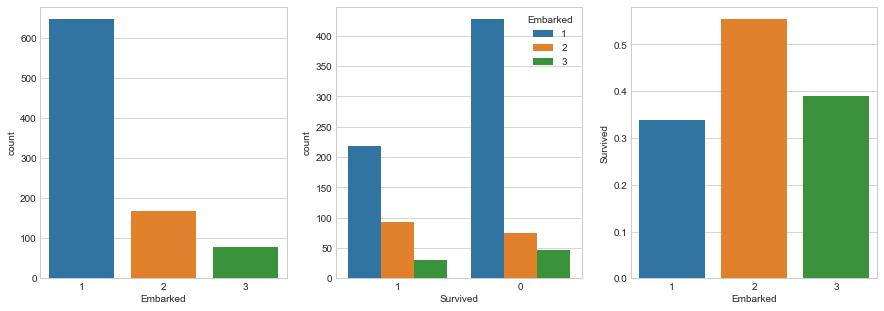

In [10]:
sns.factorplot("Embarked","Survived", data=train,size=4,aspect=3)

#枠を作る。1行の3列の枠
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x="Embarked",data=train, ax=axis1)
sns.countplot(x="Survived", hue="Embarked", data=train, order=[1,0],ax=axis2)

embark_perc = train[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean()
sns.barplot(x="Embarked",y="Survived",data=embark_perc,ax=axis3)



In [11]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,1.464115
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.685516
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [12]:
test["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [13]:
test["Fare"].median()

14.4542

In [14]:
test["Fare"].fillna(test["Fare"].median(),inplace=True)
train.isnull().sum()
train.astype({"Fare": int}).dtypes
test.astype({"Fare":int}).dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare             int32
Cabin           object
Embarked         int32
dtype: object

In [15]:
#Ageの欠損を機械学習ライブラリを使って埋める

from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(df):
    age_df = df[["Age","Embarked","Fare","Parch","SibSp","Pclass"]]
    #欠損値があるもの、ないものに分ける
    train = age_df.loc[ (df.Age.notnull())]#Ageあり
    test = age_df.loc[(df.Age.isnull())] #Age欠損
    
    y = train.values[:,0]
    X = train.values[:,1::]
    
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    #機械学習モデルの適用
    predictedAges = rtr.predict(test.values[:,1::])
    
    df.loc[ (df.Age.isnull()), "Age" ] = predictedAges
    
    return df

train = fill_missing_age(train)
test = fill_missing_age(test)

In [16]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(train[["Age","Fare"]])
train[["Age","Fare"]] = std_scale.transform(train[["Age","Fare"]])

std_scale = StandardScaler().fit(test[["Age","Fare"]])
test[["Age","Fare"]] = std_scale.transform(test[["Age","Fare"]])

In [17]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test = test.drop(['Name','Ticket','Cabin'], axis=1)


# ちゃんと drop されたか確認
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.551510,1,0,-0.502445,1
1,1,1,0,0.622549,1,0,0.786845,2


In [18]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape,X_test.shape

((891, 7), (891,), (418, 7))

In [19]:

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

models = []
models.append(("KNC",KNeighborsClassifier()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
models.append(("AdaBoost",AdaBoostClassifier()))
models.append(("GradientBoosting",GradientBoostingClassifier()))

results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=10,shuffle=False,random_state=42)
    result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())


KNC 0.803632958801
DTC 0.766629213483
SVM 0.823807740325
AdaBoost 0.811510611735
GradientBoosting 0.824981273408


In [20]:
clf = SVC()
clf.fit(X_train,Y_train)
result = clf.predict(X_test)

In [21]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": result
    })

submission.to_csv("submission.csv", index=False)